In [101]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jul 27 13:12:45 2018
@author: fj123
@description: This script encode all the midi music in the collected dataset into the 
desined data representation. The encoded data representations will be saved in .npy format
under the same directory of the midi file.
"""

import utils
import numpy as np
import os

# load all the data paths in the midi dataset.
#path = '..\\midis\\'
path = 'Jazzomat MIDI'
try:
    data_paths = [os.path.join(path, o) \
                  for o in os.listdir(path) \
                  if os.path.isdir(os.path.join(path, o))]
except OSError as e:
    print('Error: Invalid datapath!!!')

# convert all the midis into data representation and save as .npy file.
# the encoded data file will be monophinic and wrapped within one octave.
for data_path in data_paths:
    midi_files = utils.get_file_paths(data_path)
    
    for midi_file in midi_files:
        #data_cur = utils.load_data(midi_file)
        #utils.to_monophonic(data_cur)
        #data_cur = utils.to_octave(data_cur)
        
        datafile = midi_file[:len(midi_file) - 4] + '.npy'
        np.save(datafile, data_cur)

458 midifiles found.


# Feeding Jazzomat Dataset
456 midi files from different jazz artists

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jul 27 13:12:45 2018
@author: fj123
@description: This script will copy the encoded data representations in the dataset into 
data\\train and data\\validation folders. The dividing portion for train and validation 
will be 4:1.
"""

import os
import utils
import numpy as np

# get all the datapaths in the dataset
#path = '..\\midis\\'
path = 'Jazzomat MIDI'
try:
    data_paths = [os.path.join(path, o) \
                  for o in os.listdir(path) \
                  if os.path.isdir(os.path.join(path, o))]
except OSError as e:
    print('Error: Invalid datapath!!!')

count = 0
#data_paths = func
# copy the data files in to data\\train and data\\validation
# the file names are changed to be index numbers of the music pieces.
for data_path in data_paths:
    midi_datas = utils.get_data_paths(data_path)
    
    for midi_data in midi_datas:

    	data_cur = np.load(midi_data)
    	if count % 5 == 4:
    		np.save('data\\validation\\{}.npy'.format(count), data_cur)
    	else:
    		np.save('data\\train\\{}.npy'.format(count), data_cur)

    	count += 1

    print(data_path + ' done!')

Error: Invalid datapath!!!


NameError: name 'data_paths' is not defined

# Split data into training/validation, then __TRAINING__

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jul 15 11:16:10 2018
@author: fj123
@description: Use this script to train the model~=v=~
"""

import os
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Embedding, Flatten, Dropout, TimeDistributed, Reshape, Lambda
from keras.layers import LSTM, Bidirectional
from keras.optimizers import RMSprop, Adam, SGD
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, Callback
import numpy as np
import matplotlib.pyplot as plt
import utils

# define constants
NUMBER_FEATURES_OCTAVE = utils.NUMBER_FEATURES_OCTAVE # 12 midi_notes + sustain + rest + beat_start
NUMBER_FEATURES = utils.NUMBER_FEATURES # 128 midi_notes + sustain + rest + beat_start
INSTRUMENTS = utils.INSTRUMENTS # number of instruments in midifile

# parameters setting =v=
num_steps = 32
batch_size = 256
skip_step = 3
lr = 0.001
dropout = 0.4
decay_rate = 0.1 ** 6
vocabulary = 14
embedding_size = 16
hidden_size = 64
num_epochs = 50

In [8]:
# paths for training and validation data, experiment path for saving figures and models
train_data_path = 'data/train'
valid_data_path = 'data/validation'
experiment_path = 'experiment'

In [9]:
# load the training data from the encoded .npy files.
train_data = utils.reload_data_all(train_data_path)
valid_data = utils.reload_data_all(valid_data_path)

365 data files found.
done!
91 data files found.
done!


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_3 (Dropout)          (None, 32, 30)            0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, 32, 16)            496       
_________________________________________________________________
bidirectional_3 (Bidirection (None, 32, 128)           41472     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 32, 128)           98816     
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 128)           0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 32, 14)            1806      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 14)            0         
Total para

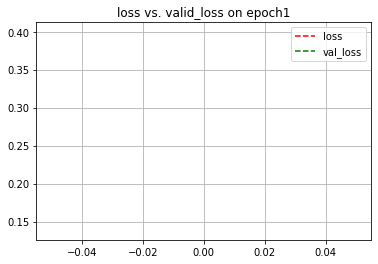

Epoch 2/50
2190/2190 [==============================] - 470s 215ms/step - loss: 0.2777 - acc: 0.9379 - val_loss: 0.1389 - val_acc: 0.9715

Epoch 00002: saving model to experimentmodel02-valloss0.14-valacc.hdf5


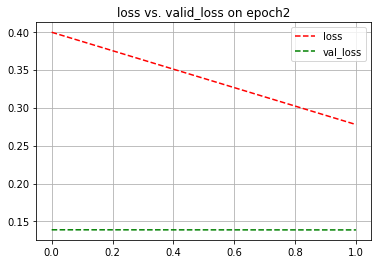

Epoch 3/50
2190/2190 [==============================] - 466s 213ms/step - loss: 0.2084 - acc: 0.9550 - val_loss: 0.1093 - val_acc: 0.9794

Epoch 00003: saving model to experimentmodel03-valloss0.11-valacc.hdf5


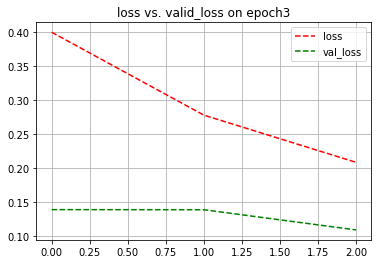

Epoch 4/50
2190/2190 [==============================] - 466s 213ms/step - loss: 0.2050 - acc: 0.9536 - val_loss: 0.0930 - val_acc: 0.9820

Epoch 00004: saving model to experimentmodel04-valloss0.09-valacc.hdf5


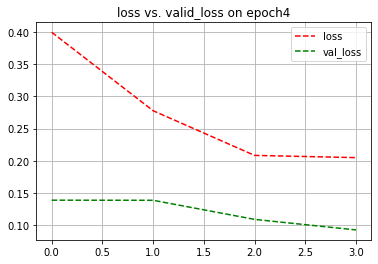

Epoch 5/50
2190/2190 [==============================] - 466s 213ms/step - loss: 0.2057 - acc: 0.9502 - val_loss: 0.0878 - val_acc: 0.9833

Epoch 00005: saving model to experimentmodel05-valloss0.09-valacc.hdf5


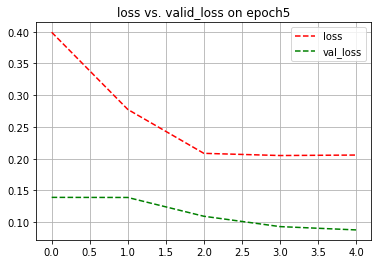

Epoch 6/50
2190/2190 [==============================] - 466s 213ms/step - loss: 0.1930 - acc: 0.9530 - val_loss: 0.0981 - val_acc: 0.9781

Epoch 00006: saving model to experimentmodel06-valloss0.10-valacc.hdf5


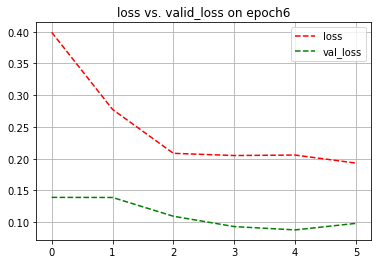

Epoch 7/50
2190/2190 [==============================] - 467s 213ms/step - loss: 0.2089 - acc: 0.9450 - val_loss: 0.1034 - val_acc: 0.9785

Epoch 00007: saving model to experimentmodel07-valloss0.10-valacc.hdf5


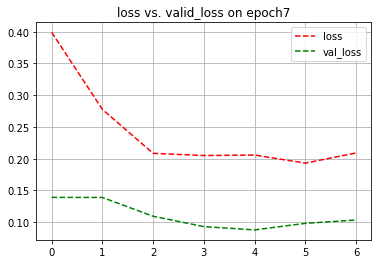

Epoch 8/50
2190/2190 [==============================] - 467s 213ms/step - loss: 0.1785 - acc: 0.9558 - val_loss: 0.0954 - val_acc: 0.9806

Epoch 00008: saving model to experimentmodel08-valloss0.10-valacc.hdf5


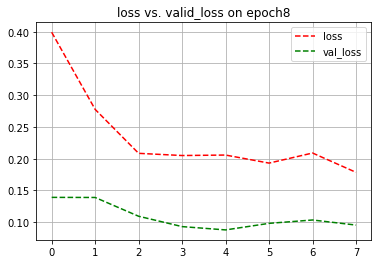

Epoch 9/50
2190/2190 [==============================] - 465s 212ms/step - loss: 0.1787 - acc: 0.9545 - val_loss: 0.0930 - val_acc: 0.9819

Epoch 00009: saving model to experimentmodel09-valloss0.09-valacc.hdf5


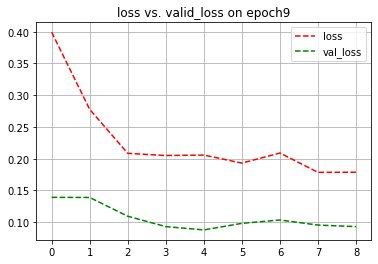

Epoch 10/50
2190/2190 [==============================] - 466s 213ms/step - loss: 0.1724 - acc: 0.9559 - val_loss: 0.0934 - val_acc: 0.9805

Epoch 00010: saving model to experimentmodel10-valloss0.09-valacc.hdf5


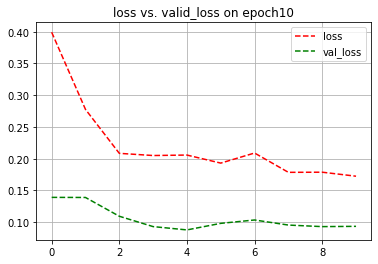

Epoch 11/50
2190/2190 [==============================] - 468s 214ms/step - loss: 0.1853 - acc: 0.9501 - val_loss: 0.1214 - val_acc: 0.9799

Epoch 00011: saving model to experimentmodel11-valloss0.12-valacc.hdf5


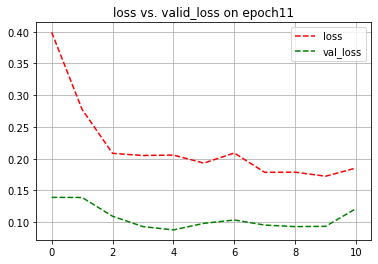

Epoch 12/50
2190/2190 [==============================] - 467s 213ms/step - loss: 0.1671 - acc: 0.9561 - val_loss: 0.0973 - val_acc: 0.9831

Epoch 00012: saving model to experimentmodel12-valloss0.10-valacc.hdf5


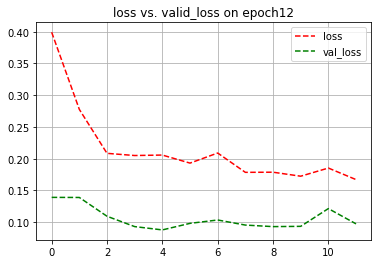

Epoch 13/50
2190/2190 [==============================] - 465s 212ms/step - loss: 0.1577 - acc: 0.9591 - val_loss: 0.1085 - val_acc: 0.9725

Epoch 00013: saving model to experimentmodel13-valloss0.11-valacc.hdf5


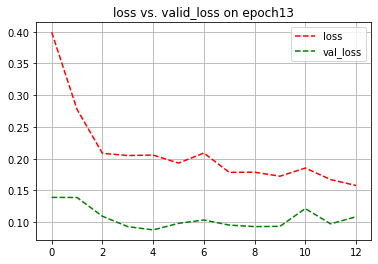

Epoch 14/50
2190/2190 [==============================] - 467s 213ms/step - loss: 0.1624 - acc: 0.9568 - val_loss: 0.1039 - val_acc: 0.9777

Epoch 00014: saving model to experimentmodel14-valloss0.10-valacc.hdf5


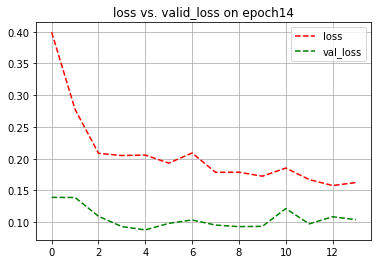

Epoch 15/50
2190/2190 [==============================] - 467s 213ms/step - loss: 0.1760 - acc: 0.9504 - val_loss: 0.0979 - val_acc: 0.9788

Epoch 00015: saving model to experimentmodel15-valloss0.10-valacc.hdf5


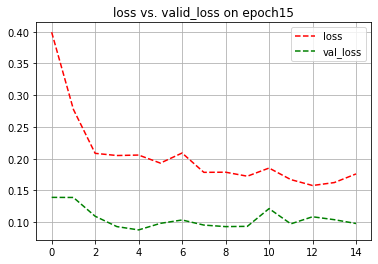

Epoch 16/50
2190/2190 [==============================] - 487s 222ms/step - loss: 0.1652 - acc: 0.9543 - val_loss: 0.1136 - val_acc: 0.9709

Epoch 00016: saving model to experimentmodel16-valloss0.11-valacc.hdf5


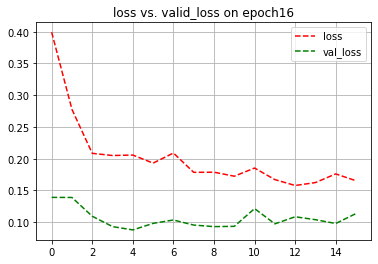

Epoch 17/50
2190/2190 [==============================] - 467s 213ms/step - loss: 0.1692 - acc: 0.9525 - val_loss: 0.0934 - val_acc: 0.9777

Epoch 00017: saving model to experimentmodel17-valloss0.09-valacc.hdf5


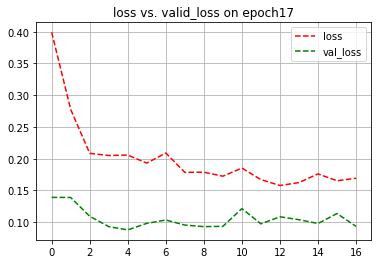

Epoch 18/50
2190/2190 [==============================] - 467s 213ms/step - loss: 0.1738 - acc: 0.9499 - val_loss: 0.0880 - val_acc: 0.9800

Epoch 00018: saving model to experimentmodel18-valloss0.09-valacc.hdf5


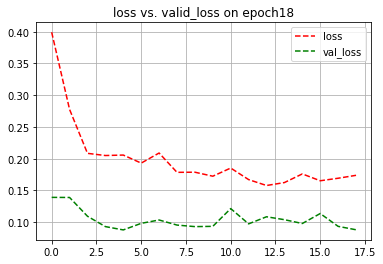

Epoch 19/50
2190/2190 [==============================] - 467s 213ms/step - loss: 0.1624 - acc: 0.9544 - val_loss: 0.1101 - val_acc: 0.9748

Epoch 00019: saving model to experimentmodel19-valloss0.11-valacc.hdf5


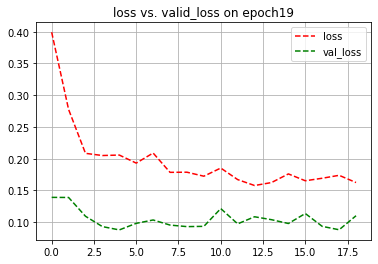

Epoch 20/50
2190/2190 [==============================] - 467s 213ms/step - loss: 0.1625 - acc: 0.9546 - val_loss: 0.1033 - val_acc: 0.9789

Epoch 00020: saving model to experimentmodel20-valloss0.10-valacc.hdf5


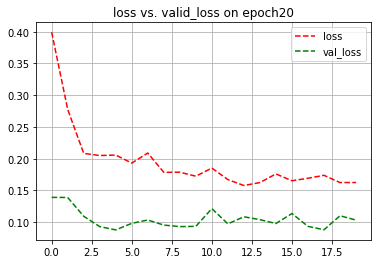

Epoch 21/50
2190/2190 [==============================] - 467s 213ms/step - loss: 0.1558 - acc: 0.9571 - val_loss: 0.1130 - val_acc: 0.9716

Epoch 00021: saving model to experimentmodel21-valloss0.11-valacc.hdf5


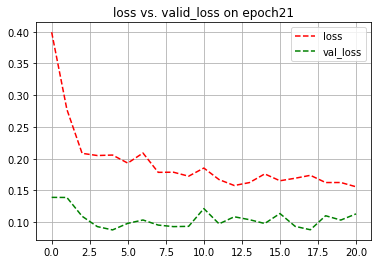

Epoch 22/50
2190/2190 [==============================] - 470s 215ms/step - loss: 0.1817 - acc: 0.9453 - val_loss: 0.0968 - val_acc: 0.9787

Epoch 00022: saving model to experimentmodel22-valloss0.10-valacc.hdf5


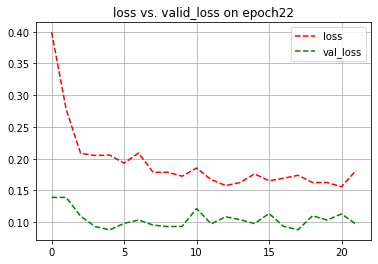

Epoch 23/50
2190/2190 [==============================] - 487s 222ms/step - loss: 0.1597 - acc: 0.9551 - val_loss: 0.0676 - val_acc: 0.9886

Epoch 00023: saving model to experimentmodel23-valloss0.07-valacc.hdf5


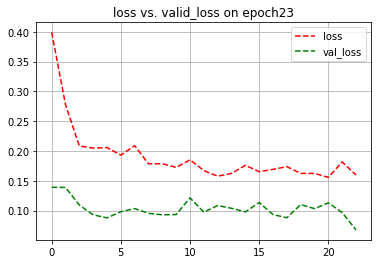

Epoch 24/50
2190/2190 [==============================] - 488s 223ms/step - loss: 0.1717 - acc: 0.9494 - val_loss: 0.1041 - val_acc: 0.9751

Epoch 00024: saving model to experimentmodel24-valloss0.10-valacc.hdf5


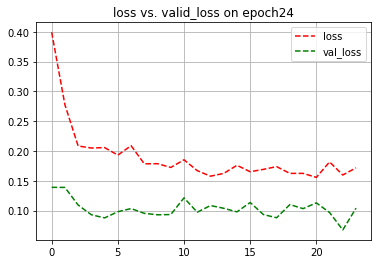

Epoch 25/50
2190/2190 [==============================] - 464s 212ms/step - loss: 0.1743 - acc: 0.9482 - val_loss: 0.0931 - val_acc: 0.9815

Epoch 00025: saving model to experimentmodel25-valloss0.09-valacc.hdf5


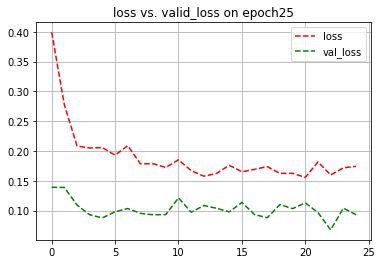

Epoch 26/50
2190/2190 [==============================] - 462s 211ms/step - loss: 0.1627 - acc: 0.9535 - val_loss: 0.0983 - val_acc: 0.9797

Epoch 00026: saving model to experimentmodel26-valloss0.10-valacc.hdf5


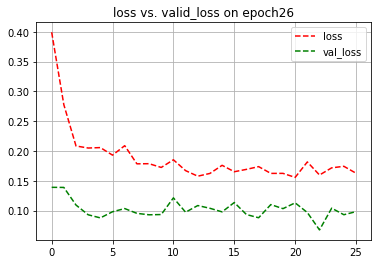

Epoch 27/50
2190/2190 [==============================] - 462s 211ms/step - loss: 0.1514 - acc: 0.9580 - val_loss: 0.0795 - val_acc: 0.9850

Epoch 00027: saving model to experimentmodel27-valloss0.08-valacc.hdf5


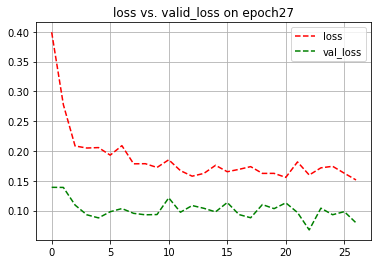

Epoch 28/50
2190/2190 [==============================] - 471s 215ms/step - loss: 0.1555 - acc: 0.9562 - val_loss: 0.0668 - val_acc: 0.9867

Epoch 00028: saving model to experimentmodel28-valloss0.07-valacc.hdf5


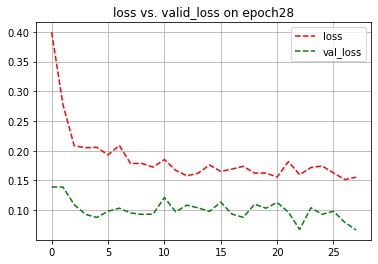

Epoch 29/50
2190/2190 [==============================] - 480s 219ms/step - loss: 0.1716 - acc: 0.9494 - val_loss: 0.0965 - val_acc: 0.9805

Epoch 00029: saving model to experimentmodel29-valloss0.10-valacc.hdf5


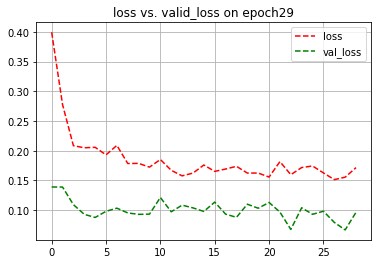

Epoch 30/50
2190/2190 [==============================] - 467s 213ms/step - loss: 0.1561 - acc: 0.9558 - val_loss: 0.0926 - val_acc: 0.9810

Epoch 00030: saving model to experimentmodel30-valloss0.09-valacc.hdf5


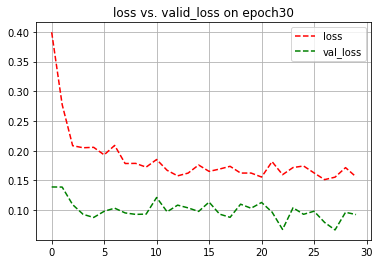

Epoch 31/50
2190/2190 [==============================] - 467s 213ms/step - loss: 0.1630 - acc: 0.9529 - val_loss: 0.1021 - val_acc: 0.9746

Epoch 00031: saving model to experimentmodel31-valloss0.10-valacc.hdf5


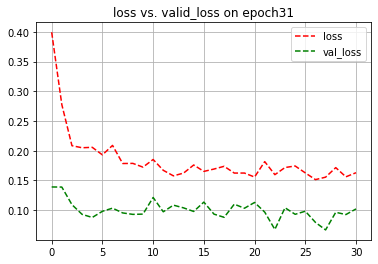

Epoch 32/50
2190/2190 [==============================] - 487s 222ms/step - loss: 0.1560 - acc: 0.9558 - val_loss: 0.0918 - val_acc: 0.9793

Epoch 00032: saving model to experimentmodel32-valloss0.09-valacc.hdf5


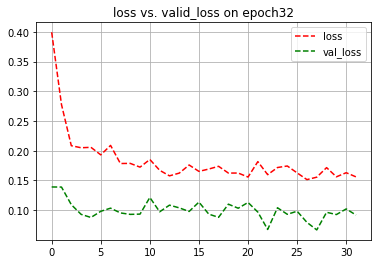

Epoch 33/50
2190/2190 [==============================] - 461s 211ms/step - loss: 0.1555 - acc: 0.9560 - val_loss: 0.0638 - val_acc: 0.9891

Epoch 00033: saving model to experimentmodel33-valloss0.06-valacc.hdf5


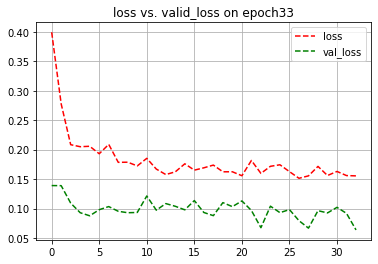

Epoch 34/50
2190/2190 [==============================] - 464s 212ms/step - loss: 0.1666 - acc: 0.9510 - val_loss: 0.0855 - val_acc: 0.9809

Epoch 00034: saving model to experimentmodel34-valloss0.09-valacc.hdf5


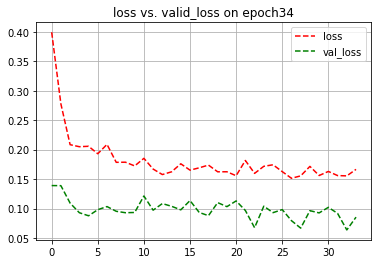

Epoch 35/50
2190/2190 [==============================] - 462s 211ms/step - loss: 0.1558 - acc: 0.9556 - val_loss: 0.1116 - val_acc: 0.9729

Epoch 00035: saving model to experimentmodel35-valloss0.11-valacc.hdf5


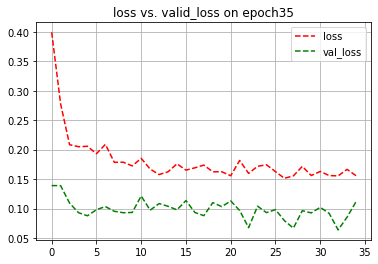

Epoch 36/50
2190/2190 [==============================] - 476s 217ms/step - loss: 0.1649 - acc: 0.9517 - val_loss: 0.0835 - val_acc: 0.9845

Epoch 00036: saving model to experimentmodel36-valloss0.08-valacc.hdf5


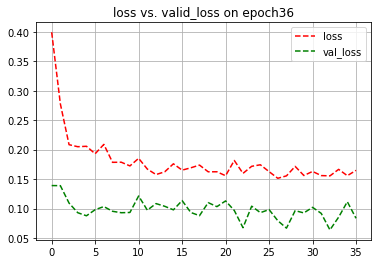

Epoch 37/50
2190/2190 [==============================] - 469s 214ms/step - loss: 0.1530 - acc: 0.9568 - val_loss: 0.0983 - val_acc: 0.9787

Epoch 00037: saving model to experimentmodel37-valloss0.10-valacc.hdf5


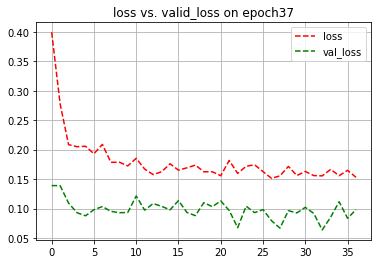

Epoch 38/50
2190/2190 [==============================] - 472s 216ms/step - loss: 0.1582 - acc: 0.9546 - val_loss: 0.1035 - val_acc: 0.9761

Epoch 00038: saving model to experimentmodel38-valloss0.10-valacc.hdf5


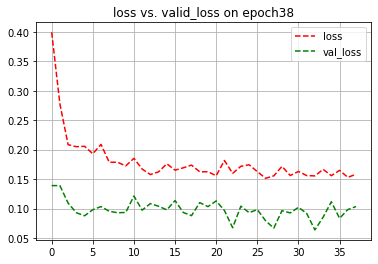

Epoch 39/50
2190/2190 [==============================] - 463s 211ms/step - loss: 0.1562 - acc: 0.9553 - val_loss: 0.1066 - val_acc: 0.9750

Epoch 00039: saving model to experimentmodel39-valloss0.11-valacc.hdf5


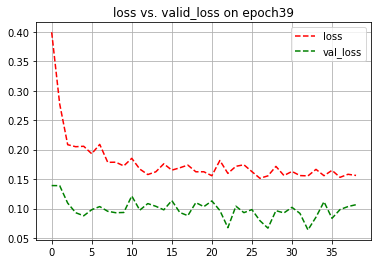

Epoch 40/50
2190/2190 [==============================] - 463s 211ms/step - loss: 0.1612 - acc: 0.9532 - val_loss: 0.0914 - val_acc: 0.9793

Epoch 00040: saving model to experimentmodel40-valloss0.09-valacc.hdf5


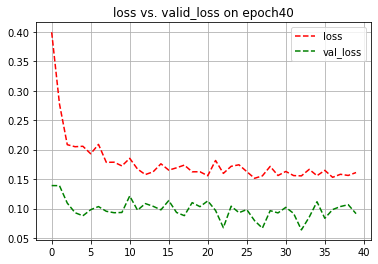

Epoch 41/50
2190/2190 [==============================] - 463s 211ms/step - loss: 0.1591 - acc: 0.9541 - val_loss: 0.1072 - val_acc: 0.9729

Epoch 00041: saving model to experimentmodel41-valloss0.11-valacc.hdf5


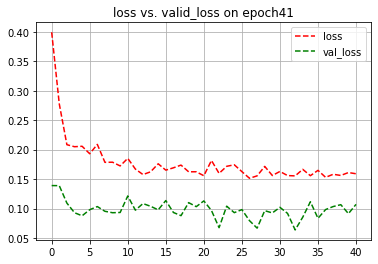

Epoch 42/50
2190/2190 [==============================] - 479s 219ms/step - loss: 0.1608 - acc: 0.9530 - val_loss: 0.0841 - val_acc: 0.9817

Epoch 00042: saving model to experimentmodel42-valloss0.08-valacc.hdf5


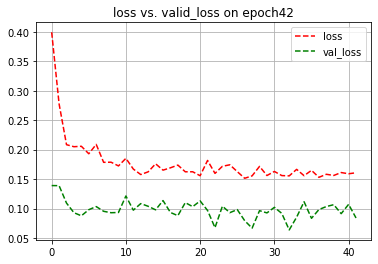

Epoch 43/50
2190/2190 [==============================] - 468s 214ms/step - loss: 0.1646 - acc: 0.9513 - val_loss: 0.1377 - val_acc: 0.9609

Epoch 00043: saving model to experimentmodel43-valloss0.14-valacc.hdf5


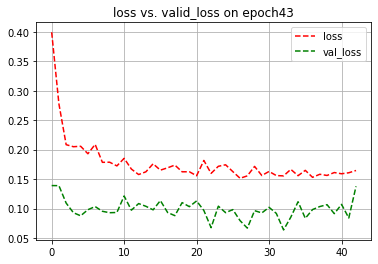

Epoch 44/50
2190/2190 [==============================] - 467s 213ms/step - loss: 0.1660 - acc: 0.9506 - val_loss: 0.1248 - val_acc: 0.9654

Epoch 00044: saving model to experimentmodel44-valloss0.12-valacc.hdf5


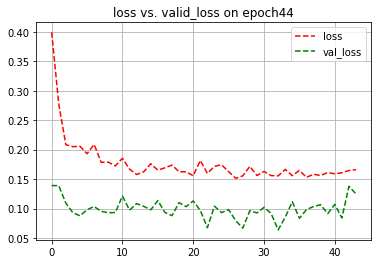

Epoch 45/50
2190/2190 [==============================] - 467s 213ms/step - loss: 0.1443 - acc: 0.9600 - val_loss: 0.0840 - val_acc: 0.9814

Epoch 00045: saving model to experimentmodel45-valloss0.08-valacc.hdf5


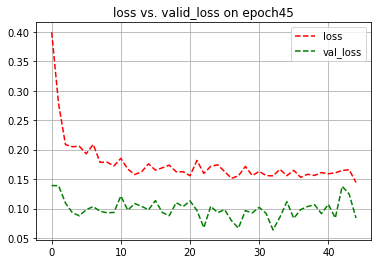

Epoch 46/50
2190/2190 [==============================] - 471s 215ms/step - loss: 0.1527 - acc: 0.9565 - val_loss: 0.1072 - val_acc: 0.9776

Epoch 00046: saving model to experimentmodel46-valloss0.11-valacc.hdf5


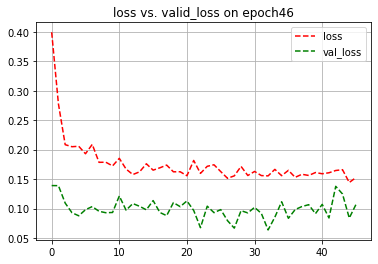

Epoch 47/50
2190/2190 [==============================] - 467s 213ms/step - loss: 0.1662 - acc: 0.9505 - val_loss: 0.1205 - val_acc: 0.9673

Epoch 00047: saving model to experimentmodel47-valloss0.12-valacc.hdf5


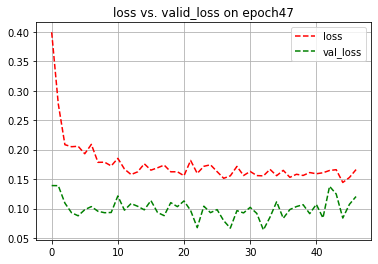

Epoch 48/50
2190/2190 [==============================] - 464s 212ms/step - loss: 0.1552 - acc: 0.9551 - val_loss: 0.0906 - val_acc: 0.9791

Epoch 00048: saving model to experimentmodel48-valloss0.09-valacc.hdf5


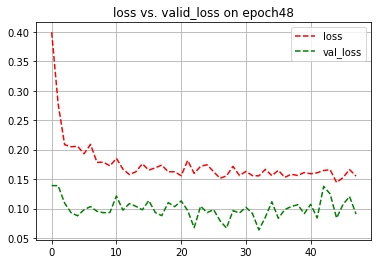

Epoch 49/50
2190/2190 [==============================] - 463s 212ms/step - loss: 0.1611 - acc: 0.9526 - val_loss: 0.1051 - val_acc: 0.9745

Epoch 00049: saving model to experimentmodel49-valloss0.11-valacc.hdf5


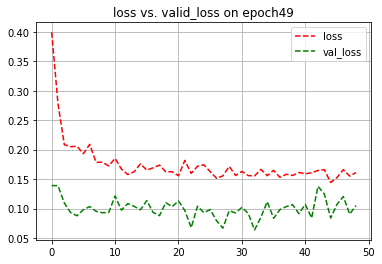

Epoch 50/50
2190/2190 [==============================] - 462s 211ms/step - loss: 0.1597 - acc: 0.9533 - val_loss: 0.0799 - val_acc: 0.9824

Epoch 00050: saving model to experimentmodel50-valloss0.08-valacc.hdf5


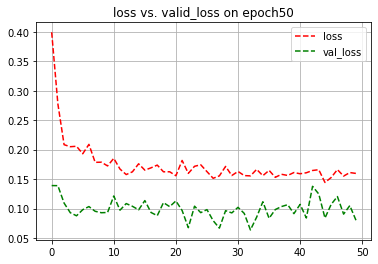

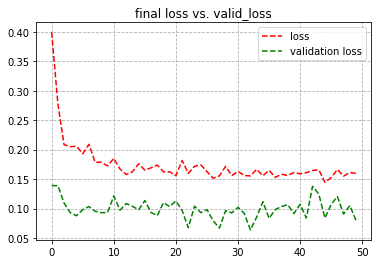

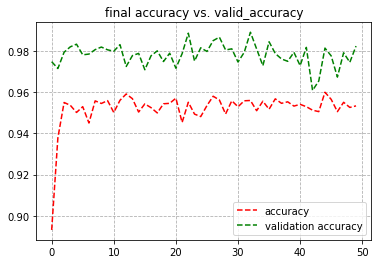

In [11]:
# this is the batch generator for generating data during model training.
class KerasBatchGenerator(object):
    
    ###########################################################################
    # data shape:
    #   (number_of_files)(INSTRUMENTS, number_of_ts_in_midi, NUMBER_FEATRUES_OCTAVE)
    # num_steps:
    #   the number of time steps in one unrolled LSTM model
    # batch_size:
    #   number of samples in one mini-batch
    # vocabulary:
    #   number of categories in output
    # skip_step:
    #   steps to skip when generate the training samples
    ###########################################################################
    
    def __init__(self, data, num_steps, batch_size, vocabulary, skip_step=3):
        # save the variables, indexes
        self.data = data
        self.num_steps = num_steps
        self.batch_size = batch_size
        self.vocabulary = vocabulary
        self.current_index = 0 # index of t in current midifile
        self.file_index = 0 # the index of current midifile
        self.skip_step = skip_step
        
        
    # generate function called at the beginning of each batch, yield input and output data
    def generate(self):
        # define dimensions for inputs and outputs
        x = np.zeros((self.batch_size, self.num_steps, INSTRUMENTS * NUMBER_FEATURES_OCTAVE), dtype=np.bool)
        y = np.zeros((self.batch_size, self.num_steps, self.vocabulary), dtype=np.bool)
        
        while True:
            for i in range(self.batch_size):
                # the ith sample in the current batch
                
                if self.current_index + self.num_steps >= len(self.data[self.file_index][0]):
                    self.current_index = 0
                    self.file_index = (self.file_index + 1) % len(self.data)
                    
                while len(self.data[self.file_index][0]) < self.num_steps:
                    self.file_index = (self.file_index + 1) % len(self.data)
                    
                # set values for input and output data
                x[i, :, :NUMBER_FEATURES_OCTAVE] = self.data[self.file_index][0, self.current_index : self.current_index + self.num_steps, :]
                x[i, 1:, NUMBER_FEATURES_OCTAVE:] = self.data[self.file_index][1, self.current_index : self.current_index + self.num_steps - 1, :]
                y[i, :, :] = self.data[self.file_index][1, self.current_index : self.current_index + self.num_steps, :self.vocabulary]
                
                self.current_index += self.skip_step
                
            yield x, y


# train and validation data batch generators.
train_data_generator = KerasBatchGenerator(train_data, num_steps, batch_size,
                                           vocabulary, skip_step=skip_step)
valid_data_generator = KerasBatchGenerator(valid_data, num_steps, batch_size,
                                           vocabulary, skip_step=skip_step)


# define model structure
model = Sequential()
model.add(Dropout(dropout, input_shape=(num_steps, NUMBER_FEATURES_OCTAVE * INSTRUMENTS)))
model.add(TimeDistributed(Dense(embedding_size)))
model.add(Bidirectional(LSTM(hidden_size, return_sequences=True)))
model.add(Bidirectional(LSTM(hidden_size, return_sequences=True)))
model.add(Dropout(dropout))
model.add(TimeDistributed(Dense(vocabulary)))
model.add(Activation('softmax'))
optimizer = Adam(lr=lr, decay=decay_rate)

#----------------------------------------------------------------------------
#----------------------------------------------------------------------------
'''def top_3_accuracy(x,y): 
    t3 = top_k_categorical_accuracy(x,y, 3)
    return t3
from tensorflow.keras.metrics import top_k_categorical_accuracy
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, 
                                   verbose=1, mode='auto', min_delta=0.005, cooldown=5, min_lr=0.0001)
earlystop = EarlyStopping(monitor='val_top_3_accuracy', mode='max', patience=5) 
callbacks = [reduceLROnPlat, earlystop]'''
#----------------------------------------------------------------------------
#----------------------------------------------------------------------------
model.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy']) #added top 3 acc
print(model.summary())

#----------------------------------------------------------------------------
'''model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', top_3_accuracy])

model.fit(x=X_train, y=y_train,
          batch_size = 50,
          epochs = 4,
          validation_data = (X_val, y_val),
          callbacks = callbacks,
          verbose = 1)
endtime = time.time()'''
#----------------------------------------------------------------------------
# save model at end of each epoch
#checkpointer = ModelCheckpoint(filepath=experiment_path + 'model{epoch:02d}-valloss{val_loss:.2f}-valacc{val_acc:.2f}.hdf5', verbose=1)
checkpointer = ModelCheckpoint(filepath=experiment_path + 'model{epoch:02d}-valloss{val_loss:.2f}-valacc.hdf5', verbose=1)

# plot losses at the end of each epoch
class PlotLosses(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.logs = []
        
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        plt.figure()
        plt.plot(self.x, self.losses, 'r--', label='loss')
        plt.plot(self.x, self.val_losses, 'g--', label='val_loss')
        plt.title('loss vs. valid_loss on epoch{}'.format(self.i))
        plt.legend()
        plt.grid()
        plt.savefig(experiment_path + 'loss vs.valid_loss epoch{}.svg'.format(self.i), format='svg')
        plt.show()
        
plot_losses = PlotLosses()

# calculate the number of steps needed for each epoch (one step per batch)
steps_per_epoch = 0
for i in range(len(train_data)):
    steps_per_epoch += len(train_data[i][0] - num_steps) // (batch_size * skip_step)
validation_steps = 0
for i in range(len(valid_data)):
    validation_steps += len(valid_data[i][0] - num_steps) // (batch_size * skip_step)


# model training!
His = model.fit_generator(train_data_generator.generate(), steps_per_epoch, num_epochs,
                    validation_data=valid_data_generator.generate(),
                    validation_steps=validation_steps,
                    callbacks=[checkpointer, plot_losses])

# plot losses in the end.
plt.figure()
plt.plot(His.history['loss'], 'r--', label='loss')
plt.plot(His.history['val_loss'], 'g--', label='validation loss')
plt.title('final loss vs. valid_loss')
plt.legend()
plt.grid(linestyle = "--")
plt.savefig(experiment_path + 'final loss vs. valid_loss.svg', format='svg')
plt.show()

# plot accuracies in the end~
plt.figure()
plt.plot(His.history['acc'], 'r--', label='accuracy')
plt.plot(His.history['val_acc'], 'g--', label='validation accuracy')
plt.title('final accuracy vs. valid_accuracy')
plt.legend()
plt.grid(linestyle = "--")
plt.savefig(experiment_path + 'final accuracy vs. valid_accuracy.svg', format='svg')
plt.show()

# save losses and accuracies during training~
np.save(experiment_path + 'History.loss.npy', His.history['loss'])
np.save(experiment_path + 'History.val_loss.npy', His.history['val_loss'])
np.save(experiment_path + 'History.acc.npy', His.history['acc'])
np.save(experiment_path + 'History.val_acc.npy', His.history['val_acc'])

# save the final model at the last epoch
model.save(experiment_path + 'final_model.hdf5')



# Generation

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug  8 21:31:19 2018

@author: fj123
@description: The script will use a selected model to generate accompaniment for midi melodies.
use command line arguments:
    midifile.mid --model_file model.hdf5 --diversity divf
the midiefile is the midi that includes the melody you want to generate accomapniemnt with, model_file
should be a model that have an input dimension of (batch_size, num_steps, INSTRUMENTS * NUMBER_FEATRUES_OCTAVE) and 
an output dimension of (batch_size, num_steps, vacabulary).
"""


from keras.models import load_model
import numpy as np
import utils
import argparse

# define constants
NUMBER_FEATURES_OCTAVE = utils.NUMBER_FEATURES_OCTAVE # 12 midi_notes + sustain + rest + beat_start
NUMBER_FEATURES = utils.NUMBER_FEATURES # 128 midi_notes + sustain + rest + beat_start
INSTRUMENTS = utils.INSTRUMENTS # number of instruments in midifile
num_steps = 32
vocabulary = 14

import easydict

Using TensorFlow backend.


In [10]:
args = easydict.EasyDict({
        "midi_file": 'partC_eva.mid',
        "model_file": 'experimentmodel50-valloss0.08-valacc.hdf5',
        "ignore": [], #if we want to ignore the drums track, it is usually 9
        "diversity": 2
    })

midi_file = args.midi_file
model_file = args.model_file
diversity = args.diversity
#diversity = 1

# load the deep learning model and data for the melodeis
model = load_model(model_file)
test_data_raw = utils.load_melody_data(midi_file)
utils.to_monophonic(test_data_raw)
test_data = utils.to_octave(test_data_raw)

# sample a note from the probability distribution.
# This helper function is copied from keras lstm examples at:
# https://github.com/keras-team/keras/blob/master/examples/lstm_text_generation.py
def sample(prediction, diversity=2):
    prediction = np.asarray(prediction).astype('float64')
    prediction = np.log(prediction) / diversity
    prediction_exp = np.exp(prediction)
    prediction = prediction_exp / np.sum(prediction_exp)
    probs = np.random.multinomial(1, prediction, 1)
    return np.argmax(probs)

----load melody data from midifile: partC_eva.mid
convert music into monophonic...
convert music into within one octave...


In [31]:
(test_data)

array([[[False, False, False, ..., False,  True,  True],
        [False, False, False, ..., False,  True, False],
        [False, False, False, ..., False,  True, False],
        ...,
        [False, False, False, ...,  True, False, False],
        [False, False, False, ...,  True, False, False],
        [False, False, False, ...,  True, False, False]],

       [[False, False, False, ..., False,  True,  True],
        [False, False, False, ..., False,  True, False],
        [False, False, False, ..., False,  True, False],
        ...,
        [False, False, False, ...,  True, False, False],
        [False, False, False, ..., False,  True, False],
        [False, False, False, ..., False, False, False]]])

In [11]:
# generate accompaniment from left to right.
test_data[1, num_steps:, :] = 0
i = 0
while i + num_steps < len(test_data[0]):
    x = np.zeros((1, num_steps, INSTRUMENTS * NUMBER_FEATURES_OCTAVE), dtype=np.bool)
    x[:, :, :NUMBER_FEATURES_OCTAVE] = test_data[0, i : i + num_steps, :]
    x[:, 1:, NUMBER_FEATURES_OCTAVE:] = test_data[1, i : i + num_steps - 1, :]
    
    prediction = model.predict(x)
    # predict_note = np.argmax(prediction[0, num_steps - 1, :])
    predict_note = sample(prediction[0, num_steps - 1, :], diversity)
    
    test_data[1, i + num_steps - 1, predict_note] = 1
    
    i += 1
    
data = utils.reverse_octave(test_data)

# combine the generated accompaniment with the original melodeis.
data_new = np.copy(test_data_raw)
data_new[1, :, :] = data[1, :, :]

# print the generated new music piece and save the music into midi file.
utils.print_data(data_new)
utils.generate_midi(data_new, midi_file[:len(midi_file)-4] + '-generate-' + model_file[:len(model_file)-5] + '-{}.mid'.format(diversity))


convert music within octave back into full piano roll...
*********************************
melody for the data is:
F2  --  --  --  --  --  --  --  F2  --  --  --  G2  --  D3  --  
00  00  00  00  00  00  00  00  00  00  00  00  00  00  00  00  

F3  --  --  --  F3  --  F3  --  B2  --  --  --  F3  --  B2  --  
00  00  00  00  00  00  00  00  00  00  00  00  00  00  00  --  00  

A3  --  A3  --  G3  --  D3  --  D2  --  --  --  D4  --  E4  --  
C3  --  --  00  C3  00  G3  00  C3  --  --  00  00  00  C3  --  

F3  --  --  --  --  --  F3  --  C3  --  E3  --  A2  --  A2  --  
--  --  00  00  D3  00  C3  00  D3  --  --  00  D3  --  B3  --  

C4  --  --  --  --  --  --  --  A3  --  --  --  A3  --  F3  --  
C3  --  00  00  00  00  D3  --  --  --  00  00  --  00  00  --  

D4  --  --  --  D4  --  E4  --  G4  --  --  --  G4  --  E4  --  
--  --  00  00  00  00  C3  00  --  --  00  00  C3  00  C3  00  

B3  --  C4  --  D4  --  E4  --  G4  --  --  --  E4  --  G4  --  
G3  --  00  --  00  00  G3  --

In [20]:
type(valid_data)

list

In [ ]:
# train the VAE on MNIST digits
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, original_dim) / 255.
x_test = x_test.reshape(-1, original_dim) / 255.

vae.fit(x_train,
        x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, x_test))

encoder = Model(x, z_mu)

In [22]:
import tensorflow as tf

In [23]:
tf.reset_default_graph()

batch_size = 64

X_in = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='X')
Y    = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='Y')
Y_flat = tf.reshape(Y, shape=[-1, 28 * 28])
keep_prob = tf.placeholder(dtype=tf.float32, shape=(), name='keep_prob')

dec_in_channels = 1
n_latent = 8

reshaped_dim = [-1, 7, 7, dec_in_channels]
inputs_decoder = 49 * dec_in_channels / 2


def lrelu(x, alpha=0.3):
    return tf.maximum(x, tf.multiply(x, alpha))

In [25]:
type(train_data_generator.generate())

generator

In [ ]:
# load the training data from the encoded .npy files.
train_data = utils.reload_data_all(train_data_path)
valid_data = utils.reload_data_all(valid_data_path)

# this is the batch generator for generating data during model training.
class KerasBatchGenerator(object):
    
    ###########################################################################
    # data shape:
    #   (number_of_files)(INSTRUMENTS, number_of_ts_in_midi, NUMBER_FEATRUES_OCTAVE)
    # num_steps:
    #   the number of time steps in one unrolled LSTM model
    # batch_size:
    #   number of samples in one mini-batch
    # vocabulary:
    #   number of categories in output
    # skip_step:
    #   steps to skip when generate the training samples
    ###########################################################################
    
    def __init__(self, data, num_steps, batch_size, vocabulary, skip_step=3):
        # save the variables, indexes
        self.data = data
        self.num_steps = num_steps
        self.batch_size = batch_size
        self.vocabulary = vocabulary
        self.current_index = 0 # index of t in current midifile
        self.file_index = 0 # the index of current midifile
        self.skip_step = skip_step
        
        
    # generate function called at the beginning of each batch, yield input and output data
    def generate(self):
        # define dimensions for inputs and outputs
        x = np.zeros((self.batch_size, self.num_steps, INSTRUMENTS * NUMBER_FEATURES_OCTAVE), dtype=np.bool)
        y = np.zeros((self.batch_size, self.num_steps, self.vocabulary), dtype=np.bool)
        
        while True:
            for i in range(self.batch_size):
                # the ith sample in the current batch
                
                if self.current_index + self.num_steps >= len(self.data[self.file_index][0]):
                    self.current_index = 0
                    self.file_index = (self.file_index + 1) % len(self.data)
                    
                while len(self.data[self.file_index][0]) < self.num_steps:
                    self.file_index = (self.file_index + 1) % len(self.data)
                    
                # set values for input and output data
                x[i, :, :NUMBER_FEATURES_OCTAVE] = self.data[self.file_index][0, self.current_index : self.current_index + self.num_steps, :]
                x[i, 1:, NUMBER_FEATURES_OCTAVE:] = self.data[self.file_index][1, self.current_index : self.current_index + self.num_steps - 1, :]
                y[i, :, :] = self.data[self.file_index][1, self.current_index : self.current_index + self.num_steps, :self.vocabulary]
                
                self.current_index += self.skip_step
                
            yield x, y


# train and validation data batch generators.
train_data_generator = KerasBatchGenerator(train_data, num_steps, batch_size,
                                           vocabulary, skip_step=skip_step)
valid_data_generator = KerasBatchGenerator(valid_data, num_steps, batch_size,
                                           vocabulary, skip_step=skip_step)


# define model structure
model = Sequential()
model.add(Dropout(dropout, input_shape=(num_steps, NUMBER_FEATURES_OCTAVE * INSTRUMENTS)))
model.add(TimeDistributed(Dense(embedding_size)))
model.add(Bidirectional(LSTM(hidden_size, return_sequences=True)))
model.add(Bidirectional(LSTM(hidden_size, return_sequences=True)))
model.add(Dropout(dropout))
model.add(TimeDistributed(Dense(vocabulary)))
model.add(Activation('softmax'))
optimizer = Adam(lr=lr, decay=decay_rate)


model.compile(loss='categorical_crossentropy', optimizer=optimizer,
              metrics=['accuracy']) #added top 3 acc
print(model.summary())


# save model at end of each epoch
#checkpointer = ModelCheckpoint(filepath=experiment_path + 'model{epoch:02d}-valloss{val_loss:.2f}-valacc{val_acc:.2f}.hdf5', verbose=1)
checkpointer = ModelCheckpoint(filepath=experiment_path + 'model{epoch:02d}-valloss{val_loss:.2f}-valacc.hdf5', verbose=1)

# plot losses at the end of each epoch
class PlotLosses(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.logs = []
        
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        plt.figure()
        plt.plot(self.x, self.losses, 'r--', label='loss')
        plt.plot(self.x, self.val_losses, 'g--', label='val_loss')
        plt.title('loss vs. valid_loss on epoch{}'.format(self.i))
        plt.legend()
        plt.grid()
        plt.savefig(experiment_path + 'loss vs.valid_loss epoch{}.svg'.format(self.i), format='svg')
        plt.show()
        
plot_losses = PlotLosses()

# calculate the number of steps needed for each epoch (one step per batch)
steps_per_epoch = 0
for i in range(len(train_data)):
    steps_per_epoch += len(train_data[i][0] - num_steps) // (batch_size * skip_step)
validation_steps = 0
for i in range(len(valid_data)):
    validation_steps += len(valid_data[i][0] - num_steps) // (batch_size * skip_step)


# model training!
His = model.fit_generator(train_data_generator.generate(), steps_per_epoch, num_epochs,
                    validation_data=valid_data_generator.generate(),
                    validation_steps=validation_steps,
                    callbacks=[checkpointer, plot_losses])